# Generative Deep Learning

Потенциал ИИ в подражении человеческим мыслительным процессам выходит за рамки пассивных задач, таких как распознования объектов, или реактивных задач, таких как вождение автомобиля. 

Сейчас он распространяется на всевозможную творческую деятельность.

* 2014 год - первые экспементы;
* 2015 год - Google Deep Dream;
* 2016 год - Prisma application;
* Лето 2016 года - экспериментальный фильм Sunspring - сценарий написан LSTM - полный диалоги!
* Конец 2016 года - музыка, написанная нейросетью;

Разумеется, пока художественные и творческие постановки от AI не совсем качественны. AI нисколько не близок к соперничеству со сценаристами, художниками и композиторами. 

Во многих областях (но особенно творческих), AI будеи использоваться людьми как инструмент для увеличения своих возможностей.

Большая часть художественного творчества состоит из простого распознавания образов и технического мастерства. И это именно та часть процесса, которую многие находят наимени привлекательной и даже пытаются её пропустить. И это то, где AI может помочь нам. Наши перцептивные модальности, наш язык, наши творческие работы все это имеет статистическую структуру. 

Изучение этой структуры - именно то, где могут помочь алгоритмы глубокого обучения. Модели машинного обучения могут изучить статистическое "латентной пространство" изображений, или музыки, или даже историй и затем просто напросто сэмплировать из этого пространства, порождая новые работы с похожими характеристиками, какие встречались в тренировочных данных. Естественно, такая выборка вряд ли является актом художественного творчества сама по себе. Это простая математическая операция: алгоритм не имеет представления о человеческой жизни, человеческих эмоциях, нашем опыте мира: вместо этого он учится на «опыте», который имеет мало общего с нашим. Только наша интерпретация, как людей, как зрителей, даст смысл тому, что создала модель.

В руках художника алгоритмическая генерация может стать более осмысленной и красивой. Сэмплирование из латентного пространства (Latent space sampling) может стать кистью, которая снабжает художника новым инструментом, дополняет творческие преимущества, расширяет пространство того, что мы можем себе представить.



## Повторение: генерация текста с помощью LSTM

Рассмотрим под несколько другим углом на уже рассматриваемый пример генерации текста. Текст по своей сути является последовательностью, и пример с генерацией текста может быть обобщен на любые последовательные данные! Вы можете применить их, например, к последовательности нот, для генерации музыки.

Последовательная генерация данных не ограничивается созданием художественного контента. Она успешно применяется в:
* синтезе речи;
* генерации диалогов для чатботов;

Технология "Smart reply" от Googla - способна автоматически генерировать выбор быстрых ответов на ваши сообщения, использует похожие техники.

### Краткая история генеративных нейронных сетей

В конце 2014, мало кто слышал аббревиатуру LSTM, даже в среде практиков машинного обучения. Однако, успешное применение генерации последовательных данных с помощью рекуррентных нейронных сетей стало повсеместно применяться в 2016. Эти технгики имеют долгую историю, которая началась с разработки алгоритма LSTM в 1997 году. этот алгоритм был использован для посимвольной генерации текста.

В 2002 году Douglas Eck применил LSTM к генерации музыки с многообещающими результатами.

В конце 2000х и ранних 2010-х Alex Graves сделал важную новаторскую работу об использовании рекуррентных нейронных сетей для генерации последовательных данных. 

Его работа в 2013 году по применению Recurrent Mixture Density Networks для генерации человекоподобного подчерка рассматривается некоторыми как поворотных момент. 

С тех пор RNN успешно применялись для генерации музыки, диалогов, генерации изображений, синтеза речи, разработки молекул, и даже создания фильмов.

### Как мы можем генерировать последовательности данных?

Универсальным способом генерировать последовательность данных в deep learning - обучить нейронную сеть (как правило, RNN или ConvNet) предсказать следующий токен или несколько токенов в последовательности с использованием предыдущих токенов в качестве входа.

Например, по входу: *the cat is on the ma*, сеть обучается предсказывать следующий целевой символ *t*. Обычно при работе с текстовыми данными токенами выступают слова или символы, и любая подобная сеть может моделировать вероятность следующего токена по предыдущим, что называется **языковой моделью**. Языковая модель захватывает **латентное пространство (latent space)** языка, т.е. его статистическую структуру.

Как только у нас будет такая обучаемая языковая модель, мы можем попробовать её в действии то есть сгенерировать новые последовательности - т.е. "скормить" некоторый текст (conditioning data), предсказать сл. символ или слово (мы можем также сгенерировать несколько слов за раз), а затем передать сгенерированные данные обратно на вход, повторив этот процесс неоднократно.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/text_generation_process.png)

Этот цикл позволяет нам сгенерировать последовательности произвольной длины, отражающие структуру данных, на которых модель обучена, то есть последовательности которые выглядят почти как предложения, написанные человеком. В нашем случае, мы берем LSTM модель, даем ей строку с N символами, выведенными из тестового корпуса, и обучаем предсказывать N+1 символ. Выходом модели будет SoftMax над всевозможными символами: вероятностное распределение для сл. символа. Эта LSTM называется character-level neural language model.

### Важность выбора стратегии сэмплирования 

При генерации текста, способ, которым мы выбираем сл. символ очень важен. Наивный подход обычно называется **greedy sampling**, который состоит в выборе наиболее вероятного сл. символа. Однако, такой подход будет приводить к повторяющимся и слишком предсказуемым строкам, которые не выглядят как согласованный язык. Более интересный подход состоит в "неожиданном выборе": т.е. введением случайности в процесс сэмплирования, например, сэмплирование из вероятностного распределения для сл. символа. Это называется "стохастическим сэмплированием". В этом случае, если 'e' имеет вероятность 0.3 стать сл. символом в соответствии с модель, мы будем выбирать 'e' в 30% случаев. Заметим, что greedy sampling сам по себе выводитя из вероятностного распределения: определенный символ имеет вероятность 1, остальные нулевую вероятность.

Вероятностное сэмплирование из выхода SoftMax является достаточно аккуратным, поскольку позволяет появляться даже маловероятным символам время от времени, таким образом, порождая интересные предложения и даже иногда демонстрируя творчество: новые, реалистично звучащие слова, которые не встречались в данных обучения! 

Но есть одна проблема с этой стратегией: она не предлагает способ контролировать случайность в процессе сэмплирования.

Почему мы хотим контролировать случайность?
Рассмотрим две экстремы: чисто случайное сэмплирование, т.е. порождение сл. символа из равномерного распределения, где каждый символ равновероятен. Эта схема будет иметь максимальную случайность, т.е. вероятностное распределение будет иметь максимальную энтропию. Естественно, это не дает ничего интересного.

Другая экстрема: жадный поход, который также не порождает ничего интересного, не имеет никакой случайности: соответствующее вероятностное распределение имеем минимальную энтропию. Сэмплирование из реального вероятностного распределения, т.е. распределение которое выводится функцией SoftMax модели представляет собой промежуточную точку между этими двумя экстремами. Однако, есть много других промежуточных точек между максимальной и минимальной энтропией, которые мы бы хотели использовать. Меньшая нтропия даст генерируемые предложения более  предсказательной структуры (и поэтому, они потенциально будут выглядеть более реалистично), в то время как больше энтропии приведет к большим сюрпризам и достаточно творческим последовательностям. При сэмплировании из генеративной модели всегда хорошо исследовать разные степени случайности в процессе генерации. Но следует помнить, что конечными судьями являемся мы, люди, и наша оценка субъективна, и заранее нельзя дать совет, где лежит оптимальная энтропия.

Чтобы контролировать стохастичность процесса сэмплирования, введем параметр называемый "softmax temperature", который характеризует энтропию вероятностного распределения используемую для сэмплирования, или другими словами, характеризует насколько "необычным" или предсказуемым будет наш выбор сл. символа. По заданному значению температуры, новое вероятностное распределение вычисляется на базе оригинального (softmax выхода модели) посредством "взвешивания" (reweighting) сл. образом:

In [10]:
import numpy as np

def reweight_distribution(original_distribution, temperature=0.5):
    """Reweight a probability distribution to increase or decrease entropy.

    # Arguments
        original_distribution: A 1D Numpy array of probability values.
            Must sum to one.
        temperature: Factor quantifying the entropy of the output distribution.

    # Returns
        A re-weighted version of the original distribution.
    """
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    # The sum of the distribution may no longer be 1!
    # Thus we divide it by its sum to obtain the new distribution.
    return distribution / np.sum(distribution)

Более высокие значения "температуры" приводят к распределению выборки более высокой энтропии, что приведет к созданию более неожиданных и неструктурируемых сгенерированных данных, более низкие "температуры" приведут к меньшей случайности и более предсказуемым генерируемым данным.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/temperature.png)

### Реализация charcter-level LSTM generation

Реализуем идеи на практике.

Сначала нам нужно загрузить текст для обучения языковой модели. Это должен быть достаточно большой текстовый файл или целое множество. В нашем примере рассмотрим тексты Ницше. Языковая модель будет специфической моделью стиля Ницше и со специфичными темами (таким образом, лишь частная языковая модель англ. языка).

**Подготовка данных**

Загрузка корпуса и конвертация его в нижний регистр:

In [11]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

606208/600901 [==============================] - 1s 2us/step
Corpus length: 600901


Будем извлекать частично-перекрывающиеся последовательности длины 
    maxlen
унитарно кодируя их (one-hot encode) и затем упаковывая их в 3D NumPy массив x размерности 
    (sequences, maxlen, unique_characters).
    
Одновременно, мы подготавливаем массив y содержащий соответствующие целевые символы: унитарно закодированные символы, которые появляютсыя после показанной модели последовательности.

In [12]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 200281
Unique characters: 59
Vectorization...


**Построение сети**

Построим один слой LSTM, за которым идет полносвязный слой Dense с функцией активации SoftMax. Но также отметим что RNN не единственный способ, которым можно провести генерации последовательностей данных; 1D свертка также показывает успешное решение этой задачи.

In [13]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

Используется унитарное кодирование для нашей целевой переменной, поэтому используем категориальную кросс-энтропию в качестве функции потерь для модели:

In [14]:
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

**Обучение языковой модели и сэмплирование из нее**

Пусть дана обученная модель и задан некоторый текстовый снипет, мы генерируем новый текст повторяя сл. последовательность операций:

1. Вывод из модели вероятностного распределения над сл. символом при уже уже доступном тексте;
* Взвешивание (reweighting) распределения до определенной "температуры";
* Сэмплирование сл. символа случайным образом в соответствии с измененным распределением;
* Добавление нового символа в конец доступного текста.

В коде мы используем "повторное взвешивание" (reweight) исходного вероятностного распределения, выведенного из модели, и генерируем символ из нее (т.е. функция сэмплинга).

In [15]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Наконец, в цикл, где мы неоднократно обучаем и генерируем текстю Мы начинаем генерпацию текста с использованием диапазона различных температур после каждой эпохи. Это позволяет нам увидеть, как сгенерированный текст развивается по мере сходимости модели, а также влияние температуры в стратегии сэмплирования:

In [16]:
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    model.fit(x, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

epoch 1
Epoch 1/1
200281/200281 [==============================] - 429s 2ms/step - loss: 2.0050
--- Generating with seed: "m
properly--he changes and changes. let us look at the ninet"
------ temperature: 0.2
m
properly--he changes and changes. let us look at the ninets of the strong of the say as a man in the supersious and stready and something form the man into the stree the strong and strong believes in the strong the sperial the persopice and strong and strong in in the strengtion of the stready and strong of the stready as in the strongs of the stread the such as intersility of the streads to the stree something of the stration of the say the believed the
------ temperature: 0.5
 stree something of the stration of the say the believed the persopices frates of the stread the stranging forms the man infordations and stand the wasted to the order the fact the "intendenest believer and way form of the long inciess, fould not are to from seems the man and something as all the adound t

to be the e helw, and all hoped something of its presisous wickerian as the whum and churdiausable "nobled,. cour oragenends",
the other
jetulable of the most conscience
of
otherness, so time nature sedigicrous highly al
------ temperature: 1.2
onscience
of
otherness, so time nature sedigicrous highly also denua's eanters woad, brot! perelfalgg it is
the
pholomisiness from our "with it
a belent sensek. believer to make frogt of greatedraties of all fibsness, a yes over-materablence hiness honedy to be intellect to conditions and dety."--proore oberily us and a
centust of nofulishound a veiltodination in us."
the developed of
srould no houd tect thin;
the
fray all differals on a rristaria placudin
epoch 9
Epoch 1/1
200281/200281 [==============================] - 425s 2ms/step - loss: 1.3943
--- Generating with seed: "--that is philosophy in its last throes, an end, an agony,
s"
------ temperature: 0.2
--that is philosophy in its last throes, an end, an agony,
so the such a strength of 

will, but it is strongest and most pain of the basis of the subjection of the most and the highest and all the same training the world of the present the same time the supporable and subvivitus of the same t

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ime the case of the love of the action of the sense of the contrary of the same time the man and the self-every moral and and as the sense of the self--as the character of the self-causes of the special and sense of the subj
------ temperature: 0.5
cter of the self-causes of the special and sense of the subject and the valuation and formsion and most such a new the suppority of the living to the comment as his discorders the foundation of morality, and in the philosopher of the truth and his significations and general and all sange in all the any wondken failful for the most discorders, the good manifests and precisely of the promise manifested by the comment subjection of the demands and sublime of 
------ temperature: 1.0
ted by the comment subjection of the demands and sublime of ridic to ons go, i have
grat
the were not abssing, necessary
to the most sympathisms other taken, lees pers-is nright to and deteram still revaniabs to your natural
seaments
that matte maodhing by the
insti

     became a ghost have been active and contradict the same to be a philosophy of the end of the present of the extent the end of the conscience of the subtle and such a persists of the present of the fact of the same to the end of the conscience of the contrary and desires and the end of the sense of the several and man seems the same to the sense of the spirit of the spirit of the such a sense of the contrary the su
------ temperature: 0.5
rit of the spirit of the such a sense of the contrary the such a past a longer are does the world of commander to its faitish impressions of the formsing and subcests of the end of the world of the depression of a society should indeed to he should not to be form of a conscience of the conceived, the intellect and instinct and short, in the individual as such a persists of the demands of the deparder, for instance, with
the whole soul which the end of arti
------ temperature: 1.0
der, for instance, with
the whole soul which the end of article,
is 

y necessary the pinwer. yneserhiknaty the pour accustoment in the most for time kind to deptive nor even po ficture have now ruchn
effected sladt-brul. as humanitated: their causaactimus, away thyself--thesed an
actuily
wadly, what is not onlerable"; andurecleve us. an al)? the lower man, they an
unin mo"
of nuniediansly, and svorbay europeancy also on a corrual, through to eticies of what is found
thuss such things.

r1relially hern when sintic passions o
epoch 28
Epoch 1/1
200281/200281 [==============================] - 425s 2ms/step - loss: 1.3016
--- Generating with seed: "al sense, with its truckling, plebeian
curiosity. the case i"
------ temperature: 0.2
al sense, with its truckling, plebeian
curiosity. the case in the superficial and so much the fact that the conduct and something of the spirit and some conscience of the spirit of the philosopher of the conduct and the conscience and the man is in the fact its ourselves the such a spirit and the conduct of the conduct and the 

despents of the intel-ity and in the persons and the case that in the most highesy complement of the very the capacity of such a grod belonged and insseftrient themselves himself and even to be distruded of man which has and one that and so much the intel-ity and in the still hamped and still in the still rangually complement of something to be a spiri
------ temperature: 1.0
in the still rangually complement of something to be a spirit of regards to an enveric and conquests educated, and can represence things his proces and explanaliag: the "future," which once experience appoiction and to promper to therrad toware oped at desortion,

not of doomus of the the knowledge of the origin of poor
begovents the acture of soul, at on a generated by the feeling must us themselves and as it was the badles a pertine have becommened tride
------ temperature: 1.2
ves and as it was the badles a pertine have becommened trides, (the pertict reasonation the mogh spirden "what an one undangers to
aga i

aspearal, what stoln eunstanentories, with whom the w, easily. ther spourd seleid to implide, oduate man: above the way as metaphysicedly in function of equalizing not be looked of love, or endurxoins a naturs" find or leest, at the visio
epoch 43
Epoch 1/1
200281/200281 [==============================] - 427s 2ms/step - loss: 1.2937
--- Generating with seed: "--and
work-day again:--as a kind of cleverly devised, clever"
------ temperature: 0.2
--and
work-day again:--as a kind of cleverly devised, clever and the self-other the spirituality of the spiritualising and soul is the depths of the same time of the commonis of the spiritualising of the sense of the states of the self-one which is also the self-one which has at the states of the problem and the spirituality to the sense of the problem and the spirituality of the spiritualising of the self-other states, and the sense of the self-exempered 
------ temperature: 0.5
 the self-other states, and the sense of the self-exempered differ

KeyboardInterrupt: 

Вот что получается в 20 эпоху, задолго до сходимости модели. Мы использовали изначальный текст:

С температурой 0.20:

С температурой 0.50:

С температурой 1.0:

На двадцатой эпохе модель начинает сходиться и текст начинает выглядеть более когерентно.


Как можно увидеть, низкие температуры приводят к чрезвычайно повторяющемуся и предсказуемуму тексту, но где локальная структура чрезвычайно реалистична: в частности, все слова (слово является локальным паттерном символов) действительно являются реальными английскими словами.

С ростом температуры, генерируемый текст становится более интересным, и даже креативным; иногда можно увидеть изобретение новых слов, которые тем не менее, звучат вполне согласовано (eterned, troveration). Ну а с высокими температурами, локальная структура начинает прерываться и большинство слов выглядят как по большей части случайные строки символов. 

Очевидно, 0.5 достаточно адекватное значение температуры для генерации текста при данных параметрах. **Всегда экспериментируйте с несколькими стратегиями сэмплинга!**
Определенный баланс между обученной структурой и слуайностью делает генерацию более интересной.

Заметим, что обучение большой модели является достаточно долгим и требует больше данных, но на ней вы можете достичь генерации текстов, которые будут выглядетьб более когерентно и реалистично.

Но разумеется, не надо пока ожидать какого либо семантического значимго сгенерируемого текста: все что происходит - это выборка данных из статистической модели, в которой символы появляются после символов. Язык - это канал коммуникации и в этом различие между сообщениями и статистической структурой этих сообщений (статистической структурой в которых она кодируется). 

**Резюме**

* Мы можем генерировать дискретные последовательности данных обучив модель предсказывать сл. токен по предыдущим токенам;
* В случае текста, подобная модель называется языковой моделью (language model) и может базироваться на словах или символах;
* Сэмплирование сл. токена требует баланса в мере случайности;
* Одним из способов "обращения" со случайностью является нотация softmax temperature. Всегда экспериментируйте с различными температурами, чтобы найти ту, которая дает хорошие результаты.

## Deep Dream

*Deep Dream* - представляет собой метод модификации художественного изображения, который использует представления, полученные сверточными сетями.

Техника была представлена компанией Google в 2015 году, в качестве реализации написанной с использованием библиотеки глубокого обучения Caffe (за несколько месяцев до первого публичного релизха TensorFlow). 

Эта техника быстро стала интернет сенсацией благодаря "триповым" картинкам, которые она генерировала, полные алгоритмических артефактов.

Пример выходного изрображения Deep Dream:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/deepdream_example.jpg)

Алгоритм Deep Dream почти полностью идентичен технике визуализации для фильтров свертки: запуск сверточной сети в обратном порядке: т.е. делать "градиентное восхождение" (gradient ascent) на входе в сверточную сеть чтобы максимизировать активацию конкретного фильтра на верхнем слое сверточной сети. 

Deep dream использует сл. различия:
* С помощью Deep Dream мы стараемся максимизировать активацию целых слоев, а не отдельного фильтра, тем самым одновременно смешивая вместе визуализацию большого числа атрибутов;
* Мы начинаем не с пустого, слегка зашумленного ввода, а с уже суествующего изображения - таким образом, полученные визуализации атрибутов будут "заперты" в уже существующие визуальные паттерны, искажая элементы изображенияя несколько артистичным образом;
* входное изображение обрабатывается в нескольких "шкалах" (называемых октавами), что улучшает качество визуализации.

Итак, смоделируем собственный Deep Dreams.

### Реализация Deep Dreams в Keras

Мы начнем с предобученной сверточной сети, обученной на ImageNet. В Keras доступно несколько конволюционных сетей:
* VGG16
* VGG19
* Xception
* ResNet50
* ...
хоя один и тот же процесс возможен с любым из них, выбор сверточной сети разумеется повлияет на визуализацию, поскольку разные архитектуры сверточных сетей дают различные обученные атрибуты. Сверточная сеть, используемая в оригинальном Deep Dream была моделью Inception, и известно что на практике Inception порождает очень интересные Deep Dreams, поэтому будем использовать InceptionV3 модель, которая поставляется с Keras.

Загрузка предобученной модели InceptionV3


In [ ]:
from keras.applications import inception_v3
from keras import backend as K

# We will not be training our model,
# so we use this command to disable all training-specific operations
K.set_learning_phase(0)

# Build the InceptionV3 network.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)

Затем вычислим "потерю", мы хотим максимизировать во время процесса градиентного спуска (на самом деле, восхождения градиента - gradient ascent). 

Для визуализации фильтров пытаются максимизировать значение конкретного фильтра на конкретном слое. В случае Deep Dream мы будет одновременно максимизировать активацию всех фильтров на нескольких слоях. В частности, мы будем максимизировать взвешенную сумму $L_2$-нормы активаций множества слоев высокого уровня. Точный набор слоев, которые мывыбираем (а также их вклад в финальную потерю ) имеет большое влияние на визуальные эффекты, поэтому мы можем легко настраивать эти параметры. Более низкоуровневы слои приводят к геометрическим шаблонам, а более высокоуровневые слои  приводят к визуальным эффектам, в которых мвы можете распознавать некоторые классы из ImageNet (например, птиц, или собак).

Мы начнем с некоторой произвольной конфигурации,включающей 4 слоя.


In [ ]:
# Dict mapping layer names to a coefficient
# quantifying how much the layer's activation
# will contribute to the loss we will seek to maximize.
# Note that these are layer names as they appear
# in the built-in InceptionV3 application.
# You can list all layer names using `model.summary()`.
layer_contributions = {
    'mixed2': 0.2,
    'mixed3': 3.,
    'mixed4': 2.,
    'mixed5': 1.5,
}

Определим тензор, который содержит функцию потерь, т.е. взвешенную сумму $L_2$ нормы активаций слоев, приведенных выше:

In [ ]:
# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in layer_contributions:
    # Add the L2 norm of the features of a layer to the loss.
    coeff = layer_contributions[layer_name]
    activation = layer_dict[layer_name].output

    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(activation), 'float32'))
    loss += coeff * K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

TIP:Разница между gradient descent и gradient ascent https://stats.stackexchange.com/questions/258721/gradient-ascent-vs-gradient-descent-in-logistic-regression

Запускаем gradient ascent:

In [ ]:
# This holds our generated image
dream = model.input

# Compute the gradients of the dream with regard to the loss.
grads = K.gradients(loss, dream)[0]

# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values

def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x

Сначала мы определяем список "scales" (octaves), при которых мы будем обрабатывать изображения.

Каждая последующая шкала больше чем предыдущая с фактором 1.4 (т.е. на 0% больше): мы начинаем с обработки небольшого изображения и непрерывно масштабируем его:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/deepdream_process.png)

Затем, для каждого последующей октавы (octave) с наименьшей до наибольшей, мы запускаем gradient ascent для максимизации loss, который мы ранее определили на этой октаве (at that scale/octave).

После каждого запуска gradient ascent, мы перемасштабируем результирующее изображение на 40%.

Чтобы избежать потери множества деталей изображения, после каждого последуюшего масштабирования (в результате чего получаются все более размытые и пиксельные изображения), применяем простой трюк: после каждого масштабирования, мы врзвращаем потерянные детали обратно в изображение, что возможно из-за того, что мы знаем как должно выглядеть исходное изображение в более широком масштабе. Если задано небольшое изображение S и большое изображение L, мы можем вычислить разницу между исходным изображением (предполагаемым размером большее чем L), измененным до размера L и исходным размером измененным до размера S - эта разница измеряет детали, потерянные при переходе от S к L.


(Source text: To avoid losing a lot of image detail after each successive upscaling (resulting in increasingly blurry or pixelated images), we leverage a simple trick: after each upscaling, we reinject the lost details back into the image, which is possible since we know what the original image should look like at the larger scale. Given a small image S and a larger image size L, we can compute the difference between the original image (assumed larger than L) resized to size L and the original resized to size S — this difference quantifies the details lost when going from S to L.)

Также потребуется ряд вспомогательных функций:

In [2]:
import scipy
from keras.preprocessing import image

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Using TensorFlow backend.


In [ ]:
import numpy as np

# Playing with these hyperparameters will also allow you to achieve new effects

step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale

# If our loss gets larger than 10,
# we will interrupt the gradient ascent process, to avoid ugly artifacts
max_loss = 10.

# Fill this to the path to the image you want to use
base_image_path = './/CatsVSDogs//IMG_5103.jpg'

# Load the image into a Numpy array
img = preprocess_image(base_image_path)

# We prepare a list of shape tuples
# defining the different scales at which we will run gradient ascent
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

# Reverse list of shapes, so that they are in increasing order
successive_shapes = successive_shapes[::-1]

# Resize the Numpy array of the image to our smallest scale
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='final_dream.png')

Поскольку оригинальная сеть InceptionV3 обучена распознавать изображения размера 299x299 и учитывая что процесс включает уменьшение масштаба изображений с reasonable factor, наша реализация Deep Dream будет порождать гораздо лучшие результаты на изображениях между 300x300 - 400x400.
Но несмотря на это, по прежнему можно использовать один и тот же код на изображениях любого размера и любого соотношения.

Исходное изображение:
![](CatsVSDogs\IMG_5103.jpg)

Deep Dream: 
![](CatsVSDogs\dream_at_scale.png)


Исследуйте, что можно сделать,отрегулировав какие слои использовать в функции потерь. Слои, которые ниже в сети содержат больше локальных мене абстрактных представлений и приведут к более геометрически выглядящих моделей Deep Dream. Высокоуровневые слои приведут к более узнаваемым визуальным шаблонам, основанным на наиболее распространенных объектах ImgeNet. 

Вы можете использовать произвольное генерирование параметров в словаре
    layer_contributions
чтобы быстро исследовать множество различных комбинаций слоев.

Примеры полученные с использованием разных конфигураций слоев:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/range_of_deep_dreams.png)

**Резюме**
* Deep Dream заключается в запуске сети "в обратном порядке" для генерации входных данных, основанных на репрезентациях, обученных сверточной нейронной сетью.
* Результаты являются... интересными и имеют некоорое сходство с визуальными артефактами, которые имеют люди с нарушением зрительной коры головного мозга, или употребляющих различные вещества.
* Обратите внимание, процесс не является специфичным для моделей изображения или сверточных сетей, можно применить для речи, музыки и т.д.

## Нейронный перенос стиля (Neural Style Transfer)

Помимо Deep Dream, еще одной разработкой в deep learning-drive image modification, представленной летом 2015 - нейронные перенос стиля (Leon Gatys et al.).
Алгоритм нейронного переноса стиля имеет много уточнений и породил много вариаций, в том числе вирусное приложения длс смартфонов Prisma. Для простоты, эта секция фокусируется на формулировки из оригинальной стать.

Нейронные перенос стиля заключается в применении "стиля" референсного изображения к целевому изображению, во время конвертации "контента" целевого изображения:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/style_transfer.png)

Под "стилем" подразумеваются, по существу текступы, цвета и визуальные шаблоны, в то время как "контент" - высокоуровневая макроструктура изображения.

Идея переноса стиля тесно связанная с генерацией текстур имела долгую историю в сообществе, занимающихся обработкой изображений еще до разработки нейронного переноса стилей в 2015 году. Однако, оказалось, что реализации основанные на deep learning предлагают результаты, не имеющие аналогов в том, что можно было бы достичь с помощью классических технологий computer vision.

Ключевая идея стоящая за реализацией переноса стиля та же самая - центральная для всех алгоритмов глубокого обучения: мы определяем специфичную для задачи функцию потерь, и минимизируем её потери. Мы знаем что хотим достичь: сохранить "контент" оригинального изображения, и адаптировать"стиль" референсного изображения. Если мы можем математически определить концепты стиля и контента, тогда соответствующая функция потерь может иметь сл. структуру:

In [ ]:
loss = distance(style(reference_image) - style(generated_image)) +
       distance(content(original_image) - content(generated_image))

distance - функция нормировки, например $L_2$ норма, *content* - функция, принимающая на вход изображение и вычисляет репрезентацию его контента, а *style* - функция которая принимает изображение и вычисляет репрезентацию его стиля.

Минимизация этой функции потерь приводит к тому, что *style(generated_image)* будет близкой к *style(reference_image)*, в то время как *content(generated_image)* будет близкой к *content(original_image)*.

Фундаментальное наблюдение, сделанное Gatye et al, что сверточная глубокая сеть предлагает весьма точный способ математически определить style и content функции.

### Content loss

Активации ранних слоев в сети соответствуют локальной информации об изображении, в то время как активации поздних слоев, содержат все более глобальную и абстрактую информацию. Иначе сформулировав, активации разных слоев сверточной нейронной сети предоставляют декомпозицию контента изображения над разными пространственными шкалами (different spatial scales). Когда мы ожидаем "контент" изображения, который является более глобальным и более абстрактным, мы захватываем репрезентации с верхнего слоя конволюционной сети.

Таким образом, хорошим кандидатом на функцию потерь для контента будет рассмотрение предобученной сверточной сети и определение нашей потери как $L_2$ нормы активациями верхних слоев, вычисленных над целевым изображением и активациями того же слоя, вычисленного над сгенерированным изображением. Это гарантировало бы, что как видно с верхних слоев сверточной сети, сгенерированное изображние будет очень похоже на оригинальное целевое изображение.

Предполагая, что то, что видят верхние слои сверточной сети действительно является "контентом" входного изображения, и тогда это работает как способ сохранение контента изображения.

### Style loss

В то врея как потеря контента обрабатывает верхний слой, потеря стиля как определено у Gatys et al. обрабатывается несколькими слоями сверточной сети: мы стремимся "хахватить" внешний вид стиля референсного изображения во всех его пространственных шкалах (spatial scales), извлеченных сверточной сетью, а не только какой-либо одной шкалой.

Для функции потерь стиля (style loss), Gatys использовал матрицу Грама слоев активации, то есть скалярное произведение между картами атрибутов (feature maps) заданного слоя. Это скалярное произведение можно понимать как представление отображения корреляций между атрибутами слоя. Эти корреляции атрибут захватывают статистики паттернов конкретной пространственной шкалы (spatial scale), что эмпирически соответствует появлению текстур обнаруженных в этой шкале.

Итак, потеря стиля направлена на сохранение подобных внутренних корреляций в активациях разных слоев, по стилю референсного изображения и генерированного изображения. В свою очередь, это гарантирует что текстуры найденные в различных пространственных шкалах (spatial scales) будут выглядеть примерно одинаково в референсном изображении со стилем и генерированнои ищображении.

### In short
Итак, мы используем предобученную сверточную нейронную сеть для получения потери, которая будет:
* Сохранять контент, поддерживая аналогичные активации высокого уровня между целевым изображением контента и сгенерированным изображением. Сверточная сеть должна "видеть" какцелевое изображение, так и сгенерированное изображение как "содержащее одни и те же вещи".
* Сохранить стиль, поддерживая аналогичные корреляции среди активаций как слоев нижнего уровня, так и высокоуровневых слоев. В действительности, корреляции атрибутов захватывают текстуры: сгенерированнок и референснок изображение должно разделять одни и те же текстуры на разных пространственных шкалах (осях) (different spatial scales).

### Реализация Neural Style Transfer в Keras
Нейронный перенос стиля может быть реализован с использованием любой предобученной сверточной сети. Мы будем использовать VGG19 (которая использовалась Gatys в его статье). VGG19 - простой вариант VGG16 (которую мы изучали ранее), с 3 дополнительными сверточными слоями.

Общий процесс:
* "Поднять" сеть, которая будет вычислять активации слоев VGG19 для стиля референсного изображения целевого изображения и сгенерированного изображения в одно и то же вреия.
* Используя активации слоя, вычисленные над этими тремя изображениями, определить функцию потерь, описанную выше, которая минимизируется для достижения переноса стиля.
* Настроить процесс градиентного спуска для минимизации функции потерь.

Определим пути к изображеним:
* референсному изображению со стилем;
* целевому изображению.

Чтобы убедиться чтообработанные изображения имеют примерно одинаковые размеры (сильно варьирующиеся размеры затруднят перенос стиля), мы проведем их масштабирование на общую высоту в 400 пикселей.


In [4]:
from keras.preprocessing.image import load_img, img_to_array

# This is the path to the image you want to transform.
#target_image_path = './/CatsVSDogs//IMG_5103.jpg'
target_image_path = './/CatsVSDogs//cat.1502.jpg'

# This is the path to the style image.
style_reference_image_path = './CatsVSDogs/style_reference.jpeg'

# Dimensions of the generated picture.
width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

Нам также необходимы некоторые вспомогательные функции для загрузки, предобработки и постобработки, для изображений, которые будут входить и выходить из VGG19:

In [5]:
import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

Теперь "развернем" VGG19. Она принимает на вход пакет (batch) из 3 изображений: 
* референсного изображения стиля;
* целевого изображения;
* placeholder для сгенерированного изображения.

Placeholder - это просто символический тензор, значения которого будут предоставлены внешне, через массивы NumPy. Референсное изображение стиля и целевого изображения статические и поэтому определяются с использованием K.constant, где значения содержат placeholder сгенерированного изображения, которое будет меняться с течением времени.

Загрузка предобученной VGG19 и применение к 3 изображениям:


In [6]:
from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

# This placeholder will contain our generated image
combination_image = K.placeholder((1, img_height, img_width, 3))

# We combine the 3 images into a single batch
input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)

# We build the VGG19 network with our batch of 3 images as input.
# The model will be loaded with pre-trained ImageNet weights.
model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet',
                    include_top=False)
print('Model loaded.')

Model loaded.


Определим *content loss*, чтобы убедиться что верхний слой сверточной сети VGG19 будет иметь аналогичный вид для целевого и для сгенерированного изображения.

In [7]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))

Определим *style loss*, она обрабатывает вспомогательную функцию для вычисления матрицы Грама (Gram matrix of input matrix) входной матрицы, то есть отображение корреляций обнаруженных в оригинальной матрице атрибутов (original feature matrix)

In [8]:
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

К этим двум компонентам мы добавляем третий: общая потеря вариаций (total variation loss). Это означает что мы поощряем пространственну непрерывность в сгенерированном изображении и стремимся избежать чрезмерно неровных результатов. 

Это можно интерпретировать как своеобразную регуляризацию потерь:

In [9]:
def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

Потеря, которую мы минимизируем взвешенное среднее всех этих трех потерь. Для вычисления потери контента, мы обрабатываем только верхний слой (*block5_conv2*), в то вреия как для потери стиля мы охватываем как низкоуровневые так и высокоуровневые слои.
В конце концов, мы добавляем общую потерю вариаций.

В зависимости от референсного изображения стиля и контентного изображения, которое мы используем, вы вероятно захотите настроить коэффициент content_weight кожффициент, вклад функции потерь контента в общую функцию потерь.

Высокое значеине content_weight означает что целевой контент будет более узнаваемым в генерируемом изображении.

In [10]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block5_conv2'
# Name of layers used for style loss
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

Наконец, конфигурируем процесс градиентного спуска. В оригинальной работе Garys et al. он использовал алгоритм L-BFGS.

В этом ключевое отличие от Deep Dreamю L-BFGS - пакет в составе SciPy. Однако, есть два небольших ограничения в реализации SciPy:
* Он требует передачи значения целевой функции и значения градиента как две раздельные функции;
* Он может быть применен только к плоским векторам, в то время как мы имеем 3 мерный массив изображения.

Для нас будет вычислительно неэффективно вычислять значение функции потерь и значение её градиентов независимо, поскольку это приведет к значительным избыточным вычислениям. Мы бы получили замедление почти в два раза, чем при совместном их вычислении. Чтобы передать их, мы напишем класс Evaluator, который будет вычислять значение функции потерь и значение градиентов за раз, и мы возвращаем значение функции потерь, которое вычисляется в первый раз, а затем будем кэшировать градиенты для сл. вызова:

In [11]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

Запускаем процесс gradient ascent с использованием L-BFGS из SciPy, сохраняя текущее сгенерированное изображение на каждой итерации алгоритма (ниже одна итерация представляет 20 шагов gradient ascent):

In [9]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import time

result_prefix = 'my_result'
iterations = 20

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 1.68585e+09
Image saved as my_result_at_iteration_0.png
Iteration 0 completed in 1416s
Start of iteration 1
Current loss value: 6.01528e+08
Image saved as my_result_at_iteration_1.png
Iteration 1 completed in 956s
Start of iteration 2
Current loss value: 3.18444e+08
Image saved as my_result_at_iteration_2.png
Iteration 2 completed in 591s
Start of iteration 3
Current loss value: 2.19072e+08
Image saved as my_result_at_iteration_3.png
Iteration 3 completed in 642s
Start of iteration 4
Current loss value: 1.73704e+08
Image saved as my_result_at_iteration_4.png
Iteration 4 completed in 582s
Start of iteration 5
Current loss value: 1.46779e+08
Image saved as my_result_at_iteration_5.png
Iteration 5 completed in 567s
Start of iteration 6
Current loss value: 1.23127e+08
Image saved as my_result_at_iteration_6.png
Iteration 6 completed in 565s
Start of iteration 7
Current loss value: 1.1001e+08
Image saved as my_result_at_iteration_7.png
Iteration 7 co

KeyboardInterrupt: 

Пример который мы получили:

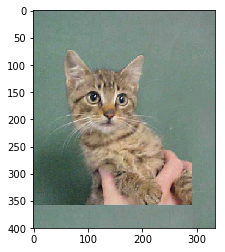

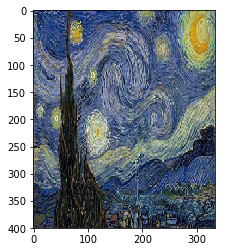

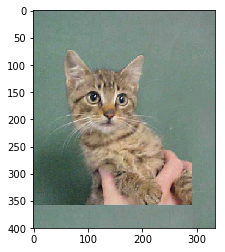

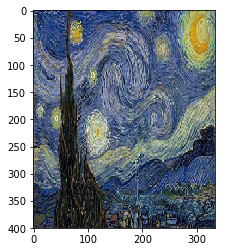

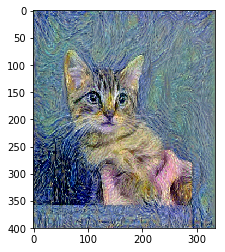

In [13]:
from matplotlib import pyplot as plt

# Content image
plt.imshow(load_img(target_image_path, target_size=(img_height, img_width)))
plt.figure()

# Style image
plt.imshow(load_img(style_reference_image_path, target_size=(img_height, img_width)))
plt.figure()


# Generate image
plt.imshow(load_img("my_result_at_iteration_13.png", target_size=(img_height, img_width)))
plt.show()

Некоторые результаты:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/revised_style_transfer_results.png)

Следует помнить, что то, чего достигает эта техника - это просто форма реструктуризации изображения или передачи текстуры. Она будет работать дучше всего с референсными изображениями стиля очень сильно текстурированы и очень похожи друг на друга и целевой контент не требует высокого уровня детализации для распознавания. Как правило, он не может достичь достаточно абстрактных умений, таких как "перенос стиля одного портрета на другой". По сути этот алгоритм ближе к обработке сигналов, поэтому не нужно от него ждать волшебства.

Выплнение алгоритма переноса стиля происходит крайне медленно. Однако, преобразование, управляемое нашим кодом достаточно простое и его можно выполнить с помощью небольшой быстрой сверточной сети - разумеется, если у нас есть соответственные обучающие данные. Быстрый перенос стиля может быть достигнут за счет значительных вычислительных трат в первое время для огромного числа циклов вычислений с целью генерации входных-выходных тренировочных примеров для фиксированного референсного изображения тиля с использованием вышеприведенного метода, и затем обучение сверточной сети для обучения сепцифичных для стиля преобразований. Как только это выполнено, стилизация будет происходить достаточно быстро - это просто forward pass небольшой сверточной сети.

**Резюме**

* Перенос стиля состоит в создании нового изображения, сохраняющео "контент" целевого изображения и захватывающий "стиль" референсного изображения;
* Контент может захватываться высокоровневыми активациями сверточной сети;
* "Стиль" может захватываться внутренними корреляциями активаций разных слоев сверточной сети;
* Deep learning позволяет сформулировать перенос стиля как процесс оптимизации с использованием функции потерь. определенной с помощью предобученной сверточной сети;

## Генерация изображение с Variational Autoencoders

Сэмплирование из латентного пространства изображений (latent space of images) для создания полностью новых изображений, или редактирование уже существующих - достаточно популярная технгика.

Рассмотрим генерацию изображений с помощью двух технологий:
* Variational Autoencoders (VAE)
* Generative Adversarial Networks (GAN);
Эти техники не ограничены только изображениями - они могут применяться к музыке, звукам и даже к тексту. Но на практике самые интересные результаты на данный момент получены на изображениях, на чем мы и сфокусируемся.

### Sampling from latent spaces of images

Ключевая идея генерации изображений состоит в разработке латентного пространства репрезентаций малой размерности (low-dimensional latent space of representations), которое по своей природе является векторным пространством, где каждая точка может быть отображена на реалистичное изображение. Модуль, способный реализовать это отображение, берет в качестве входа точку в латентном пространстве и порождает изображение, т.е. сетку пикселей, называемую генератором (в случае GAN) или декодером (в случае VAE). Как только такое латентное пространство будет разработано, то можно сэмплировать точки из него или наугад, или путем сопоставления их с пространством изображений, генерируя изображения, которые ранее не встречались (в тестовой выборке).

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/image_generation.png)

GAN и VAN просто 2 различные стратегии для обучения таким латентным пространствам репрезентаций изображений, каждая со своими собственными характеристиками.

VAE хорошо подходит для обучения латентным пространствам, которые хорошо структурированы, где конкретные направления кодируют значимую ось изменения (вариации) данных (where specific directions encode a meaningful axis of variation in the data).

GAN генерирует изображения которые могут быть потенциально высоко реалистичными, но порождаемое ими латентное пространство может не иметь такой структуры и непрерывности.

Непрерывное пространство изображений лиц, с использованием VAE:
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/face_space_dribnet.png)


### Concept vectors for image editing

Идея вектора концепта уже встречалась в теме, связанной с погружениями слов. Здесь идея остается той же самой: дано латентное пространство репрезентаций (или пространство погружений), где каждое направление в пространстве может кодировать различные оси вариаций в исходных данных. В латентном пространстве изображений лиц, например, может быть 'smile vector' s, такой что если скрытая точка z в погружении репрезентует определенное лицо, то точка z+s является репрезентацией погруженияя этого же лица, но улыбающегося.

Как только вы идентифицировали такой вектор, становится возможным редактировать изображения, проецируя их в скрытое пространствво, перемещая их представление осмысленным способом, а затем декодируя их обратно в пространство изображений. Векторы концепций существуют практически для любой независимой размерности в вариациях в пространстве изображений, - в случае изображений лиц, можно обнаружить векторы для добавления солнцезащитных очков к лицу, удаления очков, поворота мужского лица в женское и т.д.

Пример "smile vector", вектора концепта (concept vector), который был исследоватен Tom White с использованием VAE на наборе данных лиц знаменитостей (CelebA dataset):
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/smile_vector.png)





### Variational autoencoders (VAE)

VAE, одновременно исследовались Kingma & Welling (December 2013) и Rezende, Mohamed & Wierstra (January 2014) как вид генеративной модели, который особенно соответствует для задачи редактирования изображений через вектора концепций. Они являются современным подходом к автокодировщикам (Autoencoder) - тип сети, цель которой состоит в "кодировании" входа в латентное пространство малой размерности, а затем обратное декодирование  - которое смешивает идет deep learning с Байесовским выводом.

Классические автокодировщики изображений берут вхож, отображают его в латентное векторное пространство через модуль кодировщика (encoder), затем декодируют его обратно в вывод, с той же размерностью, что и оригинальное изображенгие, но через модуль декодирования. Затем его обучают, используя в качестве целевых данных те же изображения, что и входные изображения - а это означает, что автокодировщик учиться реконструировать оригинальный вход. Накладывая различные ограничения на "код", т.е. выход кодировщика (encoder), мы можем обучить автокодировщик обучать более или менее интересные латентные репрезентации данных. Чаще всего один из них ограничивает код, чтобы он имел низкую размерность и в этом случае кодировик выступает как метод компрессии входных данных.

Автокодировщик: отображение входа $x$ в сжатую репрезентацию, а затем обратное декодирование в $x'$.
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/autoencoder.jpg)

На практике такие классические автокодировщики не приводят к особо полезным, или хорошо структурированным латентным пространствам. Они не особо хороши  в компрессии. По этим причинам они в последние годы стали выходить из моды. Вариационные автокодировщики, однако, дополняют автокодировщики небольшим количеством statistical magic, заставляя их изучать непрерывные структурированные латентные пространства. Они оказались очень мощным инструментом генерации изображений.

VAE, вместо компрессии входного изображения в некоторый фиксированный "код" в латентном пространстве преобразует изображение в его параметры статистического распределения: математическое ожидание и дисперсию.

По сути это означает, что мы допускаем что входное изображение генерируется статистическим процессом и что случайность этого процесса должна учитываться во время кодирования\декодирования VAE затем использует матожидание и дисперсию для случайного сэмплирования одного элемента из распределения и декодирует этот элемент в оригинальный вход. Стохастичесность этого процесса улучшает робастность и заставляет латентное пространство кодировать осмысленные репрезентации для каждой точки, так что сэмплируемая точка из латентого пространства будет декодирована в корректный выход.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/v-6/Figures/vae.png)

В технических терминах, VAE работает сл. образом. Сначала, модуль кодировщика преобразует входные изображения *input_img* в два параметра в латентном пространстве репрезентаций, которые будет обозначать *z_mean* и *z_log_variance*. Заьем, случайно сэмплирем точку *z* из латентного нормального распределения, так что предполагается генерация входного изображения: *z = z_mean + exp(z_log_variance) x epsilon*,где *epsilon* - случайные тензор малых значений. Наконец, модуль декодера будет отображать точку в латентном пространстве обратно в оригинальное входное изображение. Поскольку *epsilon* - случаное, процесс гарантирует, что каждая точка близка к латентной локации, где мы кодируем *input_img* (*z-mean*) может быть декодирована в нечто подобное к *input_img*, что тем самым вынуждая латентное простраснтво быть непрерывно осмысленным. Любые две близкие точки в латентном пространстве декодируются в очень похожие изображения.  

Непрерывность, в сочетании с низкой размерностью латентного пространства заставляет каждое направление латентного пространства кодировать значимые оси вариаций данных, делая латентное пространство структурированным и поэтому подходящим для манипуляций с помощью векторов концептов.

Параметры VAE обучаются через 2 функции потерь: первая реконструирует потери, которые заставляют декодерованные сэмплы соответствовать начальным входам, и регуляризацию потери, которая помогает в обучении адекватного латентного пространства и уменьшает переобучение на тренировочных данных.

Схематическая форма VAE:

In [ ]:
# Encode the input into a mean and variance parameter
z_mean, z_log_variance = encoder(input_img)

# Draw a latent point using a small random epsilon
z = z_mean + exp(z_log_variance) * epsilon

# Then decode z back to an image
reconstructed_img = decoder(z)

# Instantiate a model
model = Model(input_img, reconstructed_img)

# Then train the model using 2 losses:
# a reconstruction loss and a regularization loss

Рассмотрим сеть кодировщика, очень простая сверточная сеть которая отображает входное изображение $x$ в два вектора: *z_mean* и *z_log_variance*:

In [ ]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2  # Dimensionality of the latent space: a plane

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

Код для использованиея z_mean и z_log_var, параметры статистического распределения, предположительно порожденные input_img, для отображения в точку в латентном пространстве. Мы обернули произвольную функцию в Keras lambda слой. В Keras все предполагается слоем, поэтому для выполнения произвольного кода необходимо обернуть его в слой, это то чем и занимается Lambda слой.

In [ ]:
# This is the input where we will feed `z`.
decoder_input = layers.Input(K.int_shape(z)[1:])

# Upsample to the correct number of units
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# Reshape into an image of the same shape as before our last `Flatten` layer
x = layers.Reshape(shape_before_flattening[1:])(x)

# We then apply then reverse operation to the initial
# stack of convolution layers: a `Conv2DTranspose` layers
# with corresponding parameters.
x = layers.Conv2DTranspose(32, 3,
                           padding='same', activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', activation='sigmoid')(x)
# We end up with a feature map of the same size as the original input.

# This is our decoder model.
decoder = Model(decoder_input, x)

# We then apply it to `z` to recover the decoded `z`.
z_decoded = decoder(z)

Реализация декодера: мы проводим перенормировку вектора z в размерности изображения, затем используется несколько сврточных слое жлдя получения конечного изображения той же размерности, что оригинальное.

In [ ]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # We don't use this output.
        return x

# We call our custom layer on the input and the decoded output,
# to obtain the final model output.
y = CustomVariationalLayer()([input_img, z_decoded])

Двойная потеря VAE не соответствует традиционным ожиданиям sample-wise функции в форме loss(input, target). Мы устанавливаем потери, написав слой с внутренней обработкой.

Наконец, создаем экземпляр модели и обучаем её. Поскольку о потерях заботится наш собственный слой, мы не указываем внешние потери на фазе компиляции (loss=None), что в свою очередь означает что мы не передаем целевые данные на фазе обучения (как можно заметить, мы пережаем только x_train в модель при обучении (fit)).

In [ ]:
from keras.datasets import mnist

vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

# Train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_test, None))

Рассмотрим на MNIST - можно попробовать сеть для декодирования чтобы преобразовать произвольную точку латентного пространства в изображение:

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# Linearly spaced coordinates on the unit square were transformed
# through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z,
# since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

The grid of sampled digits shows a completely continuous distribution of the different digit classes, with one digit morphing into another as you follow a path through latent space. Specific directions in this space have a meaning, e.g. there is a direction for "four-ness", "one-ness", etc.

In the next section, we cover in detail the other major tool for generating artificial images: generative adversarial networks (GANs).

### Take aways

Image generation with deep learning is done by learning latent spaces that capture statistical information about a dataset of images. By sampling points from the latent space, and "decoding" them, one can generate never-seen-before images. There are two major tools to do this: VAEs and GANs.

VAEs result in highly structured, continuous latent representations. For this reason, they work well for doing all sort of image edition in latent space, like face swapping, turning a frowning face into a smiling face, and so on. They also work nicely for doing latent space based animations, i.e. animating a walk along a cross section of the latent space, showing a starting image slowly morphing into different images in a continuous way.
GANs enable the generation of realistic single-frame images, but may not induce latent spaces with solid structure and high continuity.
Most successful practical applications I have seen with images actually rely on VAEs, but GANs are extremely popular in the world of academic research — at least circa 2016-2017. You will find out how they work and how to implement one in the next section.

To play further with image generation, I suggest working with the CelebA dataset, "Large-scale Celeb Faces Attributes". It’s a free-to-download image dataset with more than 200,000 celebrity portraits. It’s great for experimenting with concept vectors in particular. It beats MNIST for sure.

## Введение в GAN

Generative Adversarial Networks (GANs), введенные в 2014 году Goodfellow et al., являются альтернативой VAE обучению латентным простраснтвам изображений. 
Они позволяют сгенерировать достаточно реалистичные синтетические изображения, такие что сгенерированные изображения почти неотличимы от настоящих.

Интуитивный способ понимания GAN - представить себе фальсификатора, пытающегося создать фальшивую картину Пикассо. Сначала, фальсификатор будет давать очень плохие картины. Он смешивает некоторые из своих подделок с подлинными работами пикассо и показывает всем заинтересованным потенциальным покупателям. Покупатели дают оценку подлинности для каждой картины и дают обратную связь о том, похожа ли картина на картину Пикассо, и в чем не похожа. Фальсификатор уходит в свою студию и подготовливает еще несколько подделок. Со временем, фальсификатор становится вполне компетентен в имитации стиля Пикассо, а посредники становятся все большими жэкспертами в выявлении подделок.

В конце концов, они будут получать великолепные поддельные картины Пикассо.

Фактически, это то, что представляет собой GAN: сеть фальсификатора и экспертная сеть, каждая из которых обучается быть лучше другой. Таким образом, GAN состоит из двух частей:

* Generator Network - берет на вход случайный вектор (случайную точку в латентном пространстве) и декодирует её в синтетическое изображение;
* Discriminator network (adversary) - принимает на вход изображение (реальное или синтетическое) и предсказывает, является ли изображение подлинным или было порождено генератором;

Цель обучения генератора - "одурачить" дискрминатор, и поэтому она развивается в порождении все более реалистичных изображений: в конце концов искусственные изображения становятся практически неотличимыми от реальных, в той степени, что дискриминатор практически неспособен отличить их друг от друга.

В то же время, дискриминатор постоянно адаптируется к постепенному улучшению возможности генератора, задавая очень высокую стеень реализма для сгенерированных изображений. Как только обучение закончится, генератор способен будет поевратить любую точку в своем пространстве ввода в правдоподобное изображение. В отличие от VAE, это латентное пространство имеет меньшую степень в явной и осмысленной структуре, в частности, оно не является непрерывным.

Рис. Генератор преобразует случайные латентные векторы в изображения и дискрминатор пытается отличить реальные изображения от сгенерированных.
![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/08fig15_alt.jpg)

Примечательно, что GAN - это система, в которой минимум оптимизируемой функции не фиксирован, в отличии от прежних архитектур, которые мы рассматривали ранее.

В норме, градиентный спуск состоит в "скатывания" вниз по холмам в ландшафте статической функции потерь. Но с GAN, каждый шаг немного изменяет весь ландшафт!

Это динамическая система, где процесс оптимизации ищет не минимум, а равновесие между двумя силами. По этой причине, GAN чрезвычайно труден для обучения - получение GAN для работы требует аккуратной настройки архитектуры модели и параметров обучения.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/08fig16.jpg)

### Схематическая реализация GAN

Объясним как реализовать GAN в Keras в его простейшей форме. 

Конкретная реализация - deep convolutional GAN (DCGAN): GAN где генератор и дискриминатор являются глубокими конволюционными сетями (в частности, используют Conv2DTranspose слой для сэмплирования в генераторе).

Обучим GAN на изображениях из CIFAR10 - наборе данных из 50 000 изображений 32x32 RGB, относящихся к 10 классам (5000 изображений на класс).
Мы будем использовать только изображения принадлежащие к некоторому классу абстрактному frog.

Схематически, GAN выглядит сл. образом:
1. Генератор (generatr network) отображает вектора размерности (latent_dim, ) на изображения размерности (32,32,3).

2. Дискриминатор (discriminator network) отображает изображения размерности (32,32,3) на численную оценку вероятности того, что изображение реально.

3. GAN (GAN network) связывает в цепочку генератор и дискриминатор:
        gan(x) = discriminator(generator(x)).     
Поэтому, gan netrowk отобюражает латентное пространство векторов в оценки дискриминатора, оценки реализма этих латентных векторов, закодированных генератором.

4. Вы обучаете дискриминатор использовать примеры реальных и поддельных изображений вместе с метками real\fake, как и любую другую модель классификации изображений.

5. Для обучения генератора, вы используете градиенты весовых коэффициентов генератора в отношении функции потерь модели GAN. Это охачает, на каждлм шаге вы сдвигаете веса генератора в направлении, которое делает закодированные изображения быть с большей вероятностью признанными реальными дискриминатором. Другими словами, вы обучаете генератор "одурачить" дискриминатор.

### A bag of tricks

Процесс обучения и настройки GAN чрезвычайно сложен. Есть ряд известных трюков, о которых слудует помнить. Как и в большинстве вещей в deep learning, здесь больше алхимии, чем науки: эти трюки являются эвристиками, а не теоретически обоснованными методиками. Они поддерживаются некоторым интуитивным пониманием феномена, и в общем то эмпирически работают достаточно хорошо, но не обязательно в любом контексте.

Несколько трюков, используемых в реализации генератора и дискриминатора GAN.

* В рассматриваемом примере в качестве функции активации последнего слоя в генераторе, вместо симгмоидальной функции использовался гиперболический тангенс.
* Сэмплирование точек латентного пространства проихводится с использованием нормального распределения, а не равномерного распределения.
* Стохастичность хороша, чтобы вызвать устойчивость модели. Поскольку результатом обучения GAN является динамическое равновесие, GAN может "застрять" в процессе достижения этого равновесия. Введение случайности на фазе обучения помогает предотвратить это. Мы введем случайность двумя способами: использованием dropout'a в дискриминаторе и добавлением случайного шума к меткам в дискриминаторе.
* Разряженные градиенты могут препятствовать обучению GAN. В deep learning разряженность зачастую является желательным свойством, но не в GAN. Две вещи могут ввести разряженность градиента: операции max pooling и активации ReLU. 
Вместо максимального пулинга, рекомендуется использовать strided онволюции для downsampling и рекомендуется использовать LeakyReLU слой вместо активации ReLU. Он похож на ReLU, но ослабляет ограничения разряженности позволяя появляться небольшим отрицательным значениям активации
* При генерации изображений, обычно наблюдаются артефакты "шахматной доски", вызываемые неравномерным охватом пространства пикселей в генераторе. Чтобы исправить это, использовался размер ядра, который делился на размер шага (stride size), всякий раз когда мы использовали шаг (stride) в Conv2DTranspose или Conv2D как в генераторе, так и в дискриминаторе.

![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/08fig17.jpg)


### Генератор
Сначала, разработаем модель генератора (generator) который обращает вектор (случайно сэмплированный из латентного пространства на фазе обучения) в изображение кандидат. Одним из множества проблем, который возникают с GAN - генератор "застревает" на изображениях, который выглядят как шум. Возможным решением является использование dropout'a как в дискриминаторе, так и в генераторе.


In [ ]:
import keras
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

# Group 1
x = layers.Dense(128 * 16 * 16)(generator_input)                    
x = layers.LeakyReLU()(x)                                           
x = layers.Reshape((16, 16, 128))(x)                                

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

# Group 2
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)    
x = layers.LeakyReLU()(x)                                           

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

#Group 3
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x) 
#Group 4
generator = keras.models.Model(generator_input, x)                   
generator.summary()                                                  

1. Преобразование входа в карту атрибутов 16x16, 128 каналов;
2. Upsamples to 32x32;
3. Порождение 32x32 1-канальной карты атрибутов (размерность CIFAR10);
4. Инстанцирование модели генератора, которая отображает вход размерности (latent_dim, ) в изображение размерности (32,32,3).

### Дискриминатор

Разработаем модель дискриминатора, которая принимает на вход кандидат изображения (реальное или синтетическое) и классифицирует его в один или два класса: 
* сгенерированное изображение;
* реальное изображение из тренировочной выборки

In [ ]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

# 1
x = layers.Dropout(0.4)(x)                                  

# 2
x = layers.Dense(1, activation='sigmoid')(x)                

# 3
discriminator = keras.models.Model(discriminator_input, x)  
discriminator.summary()


discriminator_optimizer = keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,  # 4
    decay=1e-8)     # 5
discriminator.compile(optimizer=discriminator_optimizer,
                     loss='binary_crossentropy')

1. Один слой dropout - важный трюк!
2. Слой классификации;
3. Инстанцирование модели дискриминатора, которая преобразует вход размерности (32,32,3) в бинарное решение;
4. Использование градиентного спуска - параметр gradient clipping в оптимизаторе;
5. Стабилизация обучения, использование learning-rate затухания.

### Adversarial Network

Наконец, установим GAN, который сцепляет генератор и дискриминатор. При обучении, модель передвигается от генератора в направлении улучшения возможности "обманывать" дискриминатор. Эта модель преобразует латентное пространство точек в решение классификатора - fake или real.

Таким образом, обучение GAN обновляет веса генератора таким образом, чтобы дискриминатор с большей вероятностью предсказывал "real" при просмотре поддельных изображений. Очень вадно отметить, что дискриминатор должен быть "заморожен" во время обучения: его веса не обновляется при обучении GAN.

Если веса дискриминатора обновлялись бы во время этого процесса, тогда всегда будет предсказываться "real".


In [ ]:
# Установим веса дискриминатора не обучаемыми (только для GAN)
discriminator.trainable = False 

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

### Как обучать DCGAN

Начнем обучение. Повторим, схема обучения выглядит схематически. Для каждой эпохи делаем следующее:
1. Берем случайные точки из латентного пространства (случайный шум);
* Генерируем изображение с помощью генератора, на базе случайного шума;
* Перемешиваем сгенерированные изображения с реальными;
* Обучаем дискриминатор используя эти смешанные изображения, с сопутствующими метками: либо real (для реальных изображений), или fake (для сгенерированных изображений);
* Берем новые точки в латентном пространстве;
* Обучим GAN используя случайные вектора, с целевыми переменными, которые все говоря что "это реальные изображения". Это обновляет веса генератора (поскольку дискриминатор заморожен внутри GAN) для движения в сторону того, чтобы заставить дискриминатор предсказывать, что все изображения реальные.

In [ ]:
import os
from keras.preprocessing import image

(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data() # 1

x_train = x_train[y_train.flatten() == 6]  # 2

# 3
x_train = x_train.reshape(
    (x_train.shape[0],) +                                                  
    (height, width, channels)).astype('float32') / 255.                    

iterations = 10000
batch_size = 20
save_dir = 'your_dir'  # 4

start = 0
for step in range(iterations):
    # 5
    random_latent_vectors = np.random.normal(size=(batch_size,             
                                            latent_dim))                   
    # 6
    generated_images = generator.predict(random_latent_vectors)            

    # 7 
    stop = start + batch_size                                              
    real_images = x_train[start: stop]                                     
    combined_images = np.concatenate([generated_images, real_images])      

    # 8
    labels = np.concatenate([np.ones((batch_size, 1)),                     
                             np.zeros((batch_size, 1))])                   
    # 9
    labels += 0.05 * np.random.random(labels.shape)                        

    # 10
    d_loss = discriminator.train_on_batch(combined_images, labels)         

    # 11
    random_latent_vectors = np.random.normal(size=(batch_size,             
                                            latent_dim))                   
    # 12
    misleading_targets = np.zeros((batch_size, 1))                         
    
    # 13
    a_loss = gan.train_on_batch(random_latent_vectors,                     
                                misleading_targets)                        

    start += batch_size
    if start > len(x_train) - batch_size:
      start = 0
    # 14
    if step % 100 == 0:                                                    
        gan.save_weights('gan.h5')      # 15

        print('discriminator loss:', d_loss) # 16
        print('adversarial loss:', a_loss)   # 16

        img = image.array_to_img(generated_images[0] * 255., scale=False)  # 17
        img.save(os.path.join(save_dir,                                    # 17
                      'generated_frog' + str(step) + '.png'))              

        img = image.array_to_img(real_images[0] * 255., scale=False)       # 18
        img.save(os.path.join(save_dir,                                    # 18
                      'real_frog' + str(step) + '.png'))                   # 18

1. Loads CIFAR10 data
* Selects frog images (class 6)
* Normalizes data
* Specifies where you want to save generated images
* Samples random points in the latent space
* Decodes them to fake images
* Combines them with real images
* Assembles labels, discrim-inating real from fake images
* Adds random noise to the labels—an important trick!
* Trains the discriminator
* Samples random points in the latent space
* Assembles labels that say “these are all real images” (it’s a lie!)
* Trains the generator (via the gan model, where the discrim-inator weights are frozen)
* Occasionally saves and plots (every 100 steps)
* Saves model weights
* Prints metrics
* Saves one generated image
* Saves one real image for comparison

Во время обучения, можно увидеть что функция потерь adversatial начинает постепенно увеличиваться, в то время как дискриминатора стремится к нулю - дискриминатор может оказаться доминирующим, по отношению к генератору. В этом случае, нужно попробовать уменьшить learning rate дискриминатора и увеличить dropout rate дискриминатора.


![](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/08fig18.jpg)

* GAN состоит в сети генератора в паке с сетью дискриминатора. Дискриминатор обучается различать между выходом генератора и реальным изображением из тренировочной выборки, а генератор обучается "обманывать" дискриминатор. Надо заметить, что генератор никогда не видит примеры напрямую из тестовой выборки, информация о данных приходит из дискриминатора.
* GAN достаточно сложен в обучении, поскольку обучение GAN представляет собой динамический процесс, а не простой процесс градиентного спуска с использованием фиксированного пространства функции потерь. Для правильного обучения GAN необходимо использовать ряд эвристик, а также проводить тщательную настройку.
* GAN могут порождать более реалистичные изображения, но в отличии от VAE латентное пространство, которое они изучают не имеет аккуратное непрерывной структуры и может не подходитьт для некоторых практических приложений, таких как редактирование изображений с помощью концептуальных векторов в латентном пространстве.